# Student Details
Name :Lujana Bajracharya

Student Id: 2065878

Group: L5CG14

Module Leader: Mr. Siman Giri

Assitant Module Leader: Mr. Anmol Adhikari


In [241]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [242]:
#Necessary Inputs
#Importing numpy to use array, lists related operations in an easy-use way
import numpy as np
#Importing statsmodels.api library to perform the linear regression.
import statsmodels.api as sm
#Importing matplotlib.pyplot i.e. collection of command style functions that make matplotlib work
import matplotlib.pyplot as plt
#Importing Seaborn a Python data visualization library built on top of Matplotlib
import seaborn as sns 
#Importing pandas an open source data analysis library built on top of the Python programming language
import pandas as pd

from sklearn.model_selection import train_test_split

In [243]:
path = "/content/drive/MyDrive/Workshop2/12.csv"


# Part-I: Multiple Linear Regression[17.5]:

# 1. Data Understanding, Cleaning and Transformation[2]:
Understand what is data about and why do you think the data was collected, and what research questions
data can answers.

(a) You can explain your logic in the text cell of your notebook.

(b) Based on your research questions Identify Dependent and Independent Variables.

(c) Use pandas to load your dataset and observe the data.

If required perform basic data cleaning and Transformation the way you fits your task requirements.

In [244]:
#reading data of csv file stored in path variable
path_dataset = pd.read_csv(path)
#head()gives first five data
path_dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


The given data have information of body structure of different species of fish. The first column is categorical data containing species name of fish. The second column is weight of fish which seems to be the dependent variable.  The Length1, Length2, and Length3 column represent vertical length, diagonal length and cross length respectively. The second last and last column have height and width data of fish.

The various length, width, and height of fish determines the weight of fish. So, the second column is dependent variable and others are independent. It has data of 7 species of fish.The primary goal is to calculate fish weight using a measurement of fish body structure.

This helps to get statistical data of different species of fish.

In [245]:
#dtypes gives data type of each column
path_dataset.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [246]:
#info() method prints information about the DataFrame
path_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [247]:
#describe method returns the statistical summary of the dataframe
path_dataset.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [248]:
row = path_dataset.shape[0]
col = path_dataset.shape[1]
print("Row: ", row)
print("Column: ", col)

Row:  159
Column:  7


In [249]:
#isnull method to check null values 
check_null = path_dataset.isnull().sum
check_null

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Species  Weight  Length1  Length2  Length3  Height  Width
0      False   False    False    False    False   False  False
1      False   False    False    False    False   False  False
2      False   False    False    False    False   False  False
3      False   False    False    False    False   False  False
4      False   False    False    False    False   False  False
..       ...     ...      ...      ...      ...     ...    ...
154    False   False    False    False    False   False  False
155    False   False    False    False    False   False  False
156    False   False    False    False    False   False  False
157    False   False    False    False    False   False  False
158    False   False    False    False    False   False  False

[159 rows x 7 columns]>

In [250]:
path_dataset.duplicated().sum()

0

Text(0, 0.5, 'Weight of Fish')

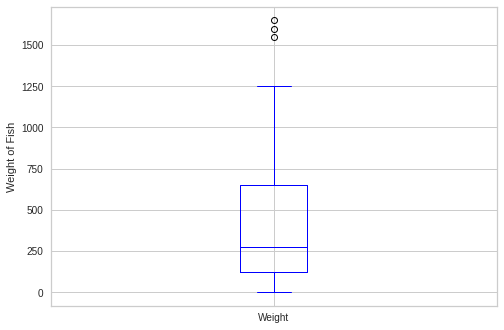

In [251]:
path_dataset.boxplot(column = ['Weight'], grid = True, color ='blue')
plt.ylabel("Weight of Fish")

In [252]:
w_Q1 = path_dataset['Weight'].quantile(0.25)
w_Q3 = path_dataset['Weight'].quantile(0.75)
w_IQR = w_Q3 - w_Q1

# Identify outliers by checking for values outside of the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers = (path_dataset['Weight'] < w_Q1 - 1.5*w_IQR) | (path_dataset['Weight'] > w_Q3 + 1.5*w_IQR)
path_dataset[outliers]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


Text(0, 0.5, 'Vertical Length of Fish')

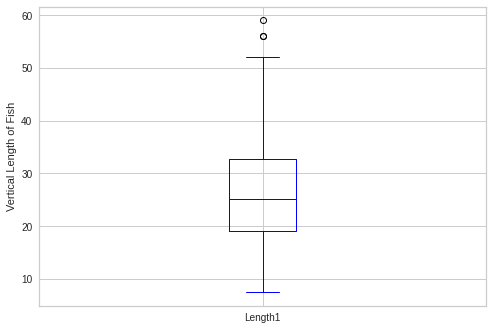

In [253]:
path_dataset.boxplot(column = ['Length1'], grid = True, color ='blue')
plt.ylabel("Vertical Length of Fish")

In [254]:
lv_Q1 = path_dataset['Length1'].quantile(0.25)
lv_Q3 = path_dataset['Length1'].quantile(0.75)
lv_IQR = lv_Q3 - lv_Q1

# Identify outliers by checking for values outside of the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers = (path_dataset['Length1'] < lv_Q1 - 1.5*lv_IQR) | (path_dataset['Length1'] > lv_Q3 + 1.5*lv_IQR)
path_dataset[outliers]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [255]:
path_dataset[142:145]


,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


From boxplot of column weight and lenght1, we found outliers lies from row 142 to row 143. Outlies can make biased and inconsistent coefficient estimates, which can give incorrect predictions and wrong analysis.Additionally, outliers might raise the variance of the coefficients, complicating their interpretation. This may lead to models that are unstable and inconsistent and give inconsistent results each time they are applied to the same set of data.

In [256]:
path_dataset[path_dataset['Weight']<=0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [257]:
path_dataset[path_dataset['Length1']<=0]

,Species,Weight,Length1,Length2,Length3,Height,Width


In [258]:
path_dataset[path_dataset['Length2']<=0]

,Species,Weight,Length1,Length2,Length3,Height,Width


In [259]:
path_dataset[path_dataset['Length3']<=0]

,Species,Weight,Length1,Length2,Length3,Height,Width


In [260]:
dataset = path_dataset.drop([40,142, 143, 144])

In weight column,row 40 has value 0. So, this column needs to be dropped for better result as it might lead to wrong prediction.

In [261]:
dataset.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,377.638065,25.698710,27.833548,30.621290,8.967102,4.382326
std,319.144511,9.133355,9.806718,10.711621,4.333722,1.675564
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.926950,3.385650
50%,272.000000,25.000000,27.000000,29.300000,7.680000,4.247600
75%,615.000000,32.250000,35.000000,39.450000,12.379300,5.472750
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


In [262]:
dataset['Species'].unique()


array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [263]:
dataset['species']=dataset['Species'].map({'Bream':1, 'Roach':2, 'Whitefish':3, 'Parkki':4, 'Perch':5, 'Pike':6, 'Smelt':7})
dataset[['species']]

,species
0,1
1,1
2,1
3,1
4,1
...,...
154,7
155,7
156,7
157,7


Text(0.5, 1.0, 'Correlation Matrix of each Column')

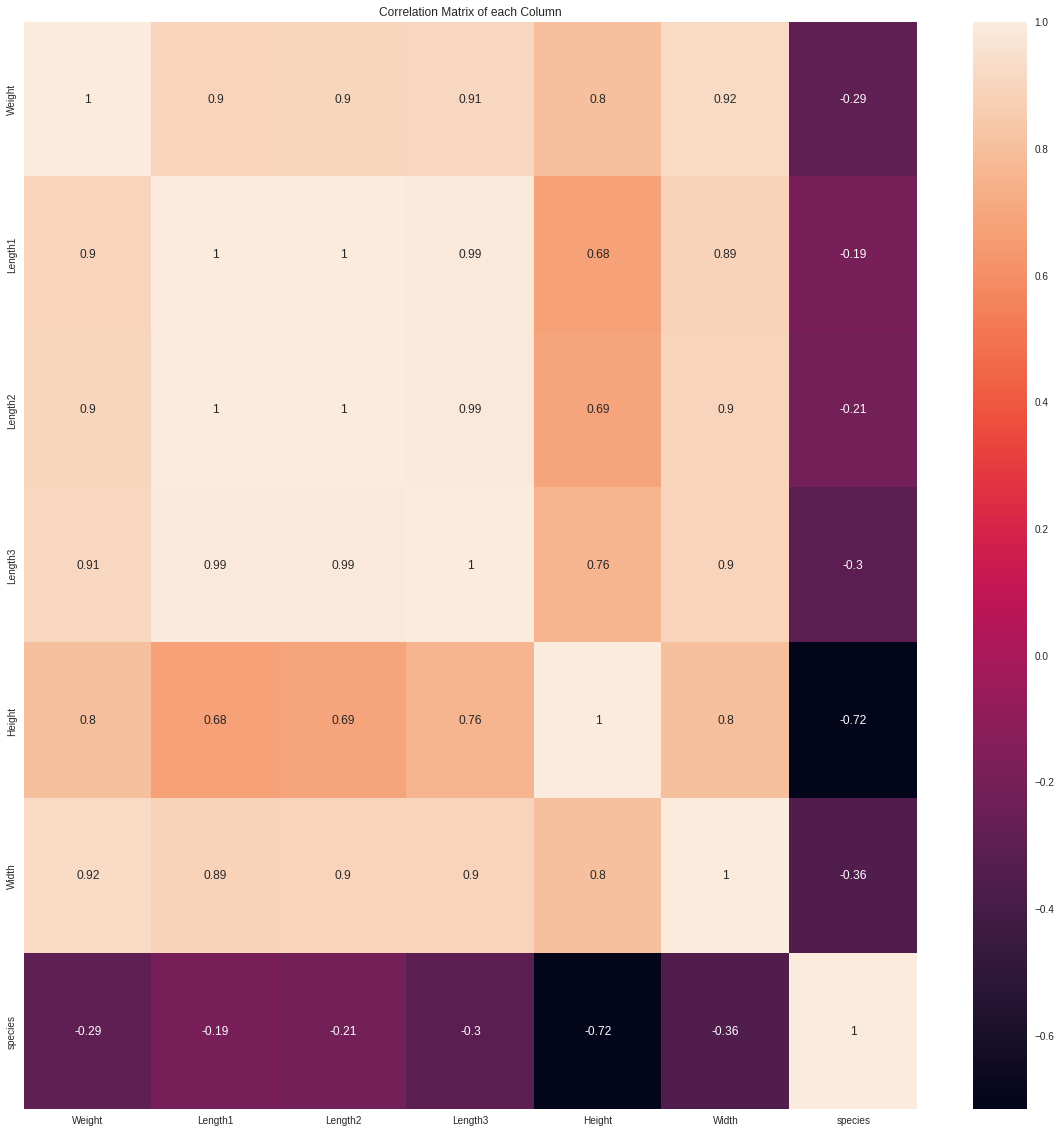

In [264]:
#corr() method gives relation between each column present in the dataset
plt.rcParams["figure.figsize"] = (20,20)
sns.heatmap(dataset.corr(),annot =True)
plt.title('Correlation Matrix of each Column')

In [301]:
#Dependent or Target Variable
Y = np.asarray(dataset['Weight'].values.tolist()) 

#Independent Variable
X = dataset.iloc[:,2:7]




The dependent varible is the outcome that is being predicted dependent upon other variable. The independent variable is the variable that predicts the values of dependent variable. Data can have only one dependent variable but multiple dependent variable. The indepent varibale is cause and dependent variable is the effect.

# 2. Data Analysis and Visualization[2.5]:
Find the descriptive statistics of your data using pandas and use matplotlib or any other library to make
various plots to generate insights from dataset.

To generate better insights from the data make visualization and plot of your Independent variable against
Dependent variable.

### Statistical Analysis

In [266]:
for col in path_dataset: # iteration for accessing each column of datasets
  if col in ["Weight", "Length1", "Length2", "Length3", "Height", "Widtg", "species"]: # checking name of columns
    print ("For column: ",col.upper()) #prints name of column in uppercase

    print ('Sum = ', path_dataset[col].sum(),'.') # return sum of all values of column 

    print('Mean = {:.2f}'.format(path_dataset[col].mean()),'.') # returns mean of column in float type

    print('Median = ',path_dataset[col].median(),'.') # returns median of column 

    print('Standard Deviation = {:.2f}'.format(path_dataset[col].std()),'.') # returns standard deviation of column in float
    
    print('Maximum = ',path_dataset[col].max(),'.') # returns maximum values of column

    print('Minimum = ',path_dataset[col].min(),'.') # returns minimum values of column
    print('\n')
    


For column:  WEIGHT
Sum =  63333.9 .
Mean = 398.33 .
Median =  273.0 .
Standard Deviation = 357.98 .
Maximum =  1650.0 .
Minimum =  0.0 .


For column:  LENGTH1
Sum =  4173.3 .
Mean = 26.25 .
Median =  25.2 .
Standard Deviation = 10.00 .
Maximum =  59.0 .
Minimum =  7.5 .


For column:  LENGTH2
Sum =  4518.1 .
Mean = 28.42 .
Median =  27.3 .
Standard Deviation = 10.72 .
Maximum =  63.4 .
Minimum =  8.4 .


For column:  LENGTH3
Sum =  4965.1 .
Mean = 31.23 .
Median =  29.4 .
Standard Deviation = 11.61 .
Maximum =  68.0 .
Minimum =  8.8 .


For column:  HEIGHT
Sum =  1426.388 .
Mean = 8.97 .
Median =  7.786 .
Standard Deviation = 4.29 .
Maximum =  18.957 .
Minimum =  1.7284 .




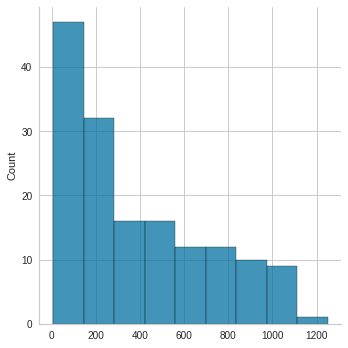

In [267]:
sns.displot(Y)

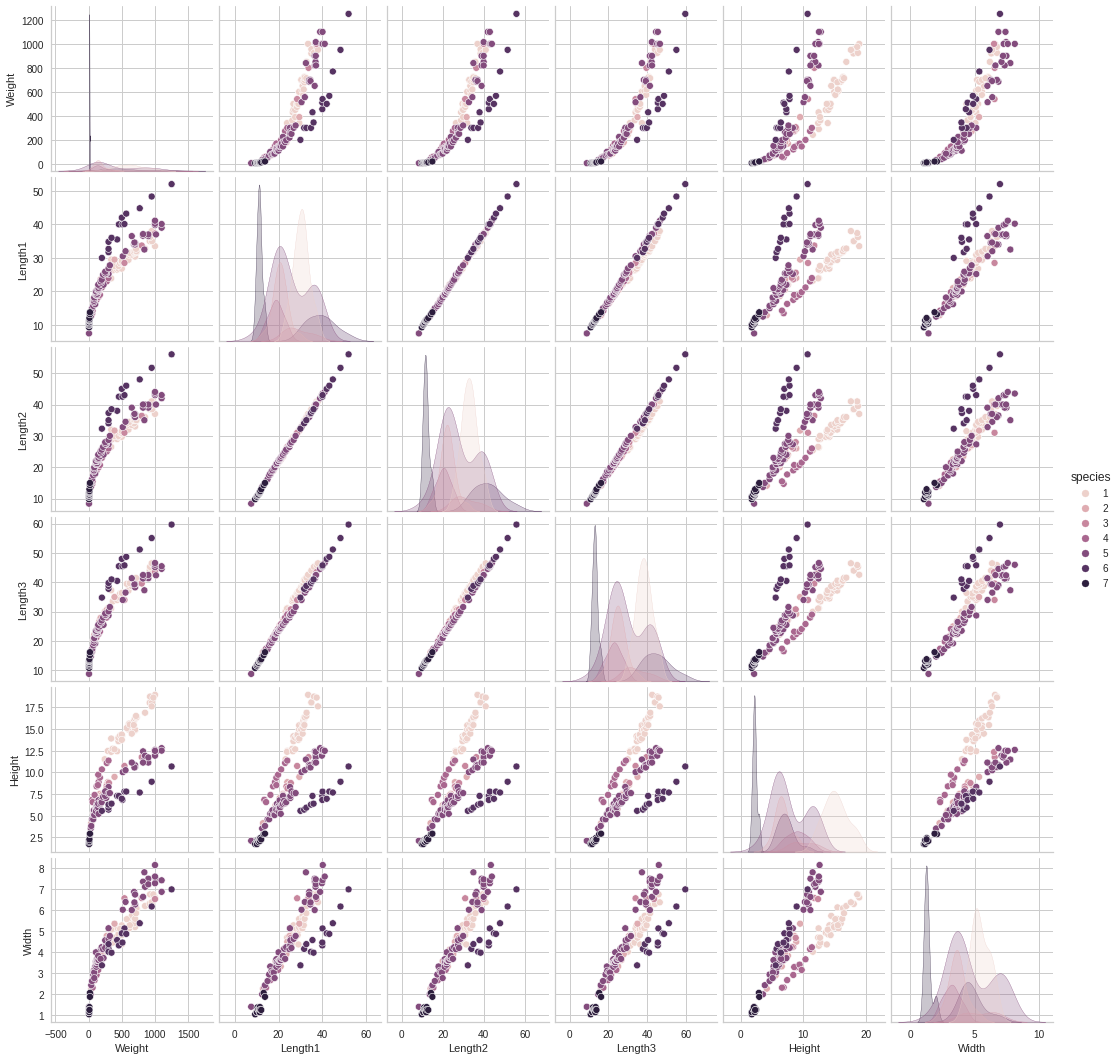

In [268]:
# pairplot with hue sex
sns.pairplot(dataset, hue ='species')
# to show
plt.show()

In [269]:
#Fish count based on species from original data
count_original = path_dataset['Species'].value_counts()
count_original = pd.DataFrame(count_original)
count_original.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


<Figure size 360x144 with 0 Axes>

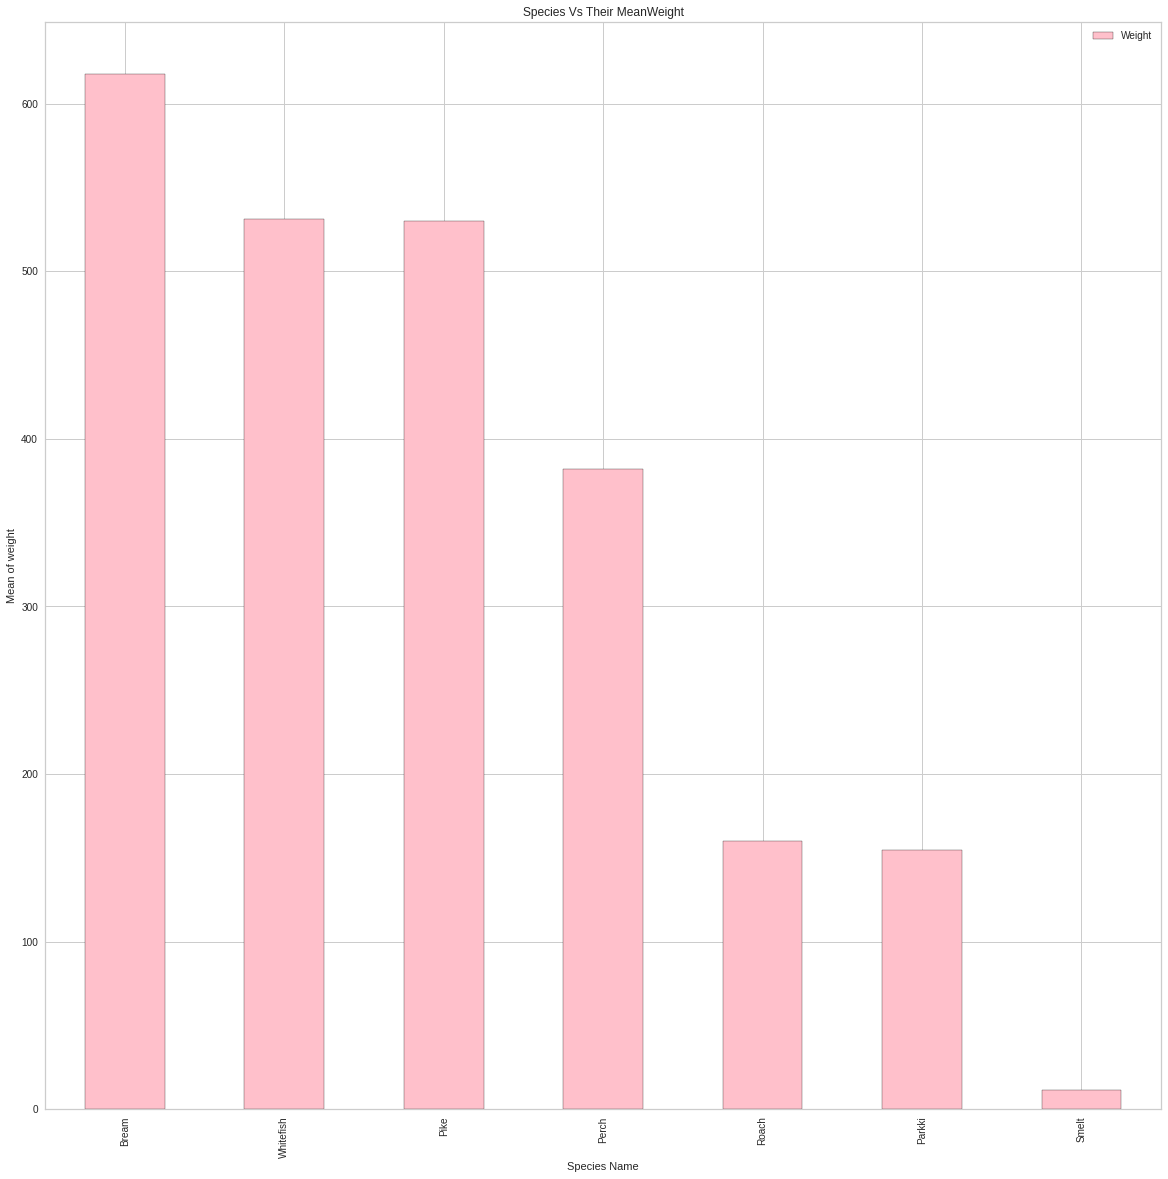

In [270]:
# The bar plot of fish and their corresponding mean weight
plt.figure(figsize=(5, 2))
df_fishx = pd.DataFrame(dataset.groupby(['Species'])['Weight'].mean().sort_values(ascending = False))
df_fishx.plot.bar(color = 'Pink', edgecolor = 'Black')
plt.xlabel("Species Name")
plt.ylabel("Mean of weight")
plt.title('Species Vs Their MeanWeight')
plt.show()

In [271]:
#Fish count based on species after dropping outliers
count_sp = dataset['species'].value_counts()
count_sp = pd.DataFrame(count_sp)
count_sp.T

,5,1,2,6,7,4,3
species,56,35,19,14,14,11,6


In [272]:
#converting column to numpy array
species = dataset['species'].to_numpy()
weight = dataset['Weight'].to_numpy()
length1 = dataset['Length1'].to_numpy()
length2 = dataset['Length2'].to_numpy()
length3 = dataset['Length3'].to_numpy()
height = dataset['Height'].to_numpy()
width = dataset['Width'].to_numpy()
#The shape of all array should me in same shape
if species.shape == weight.shape == length1.shape == length2.shape == length3.shape == height.shape == width.shape:
  print("Proceed Further")
else:
  print("Error while converting into array") 

Proceed Further


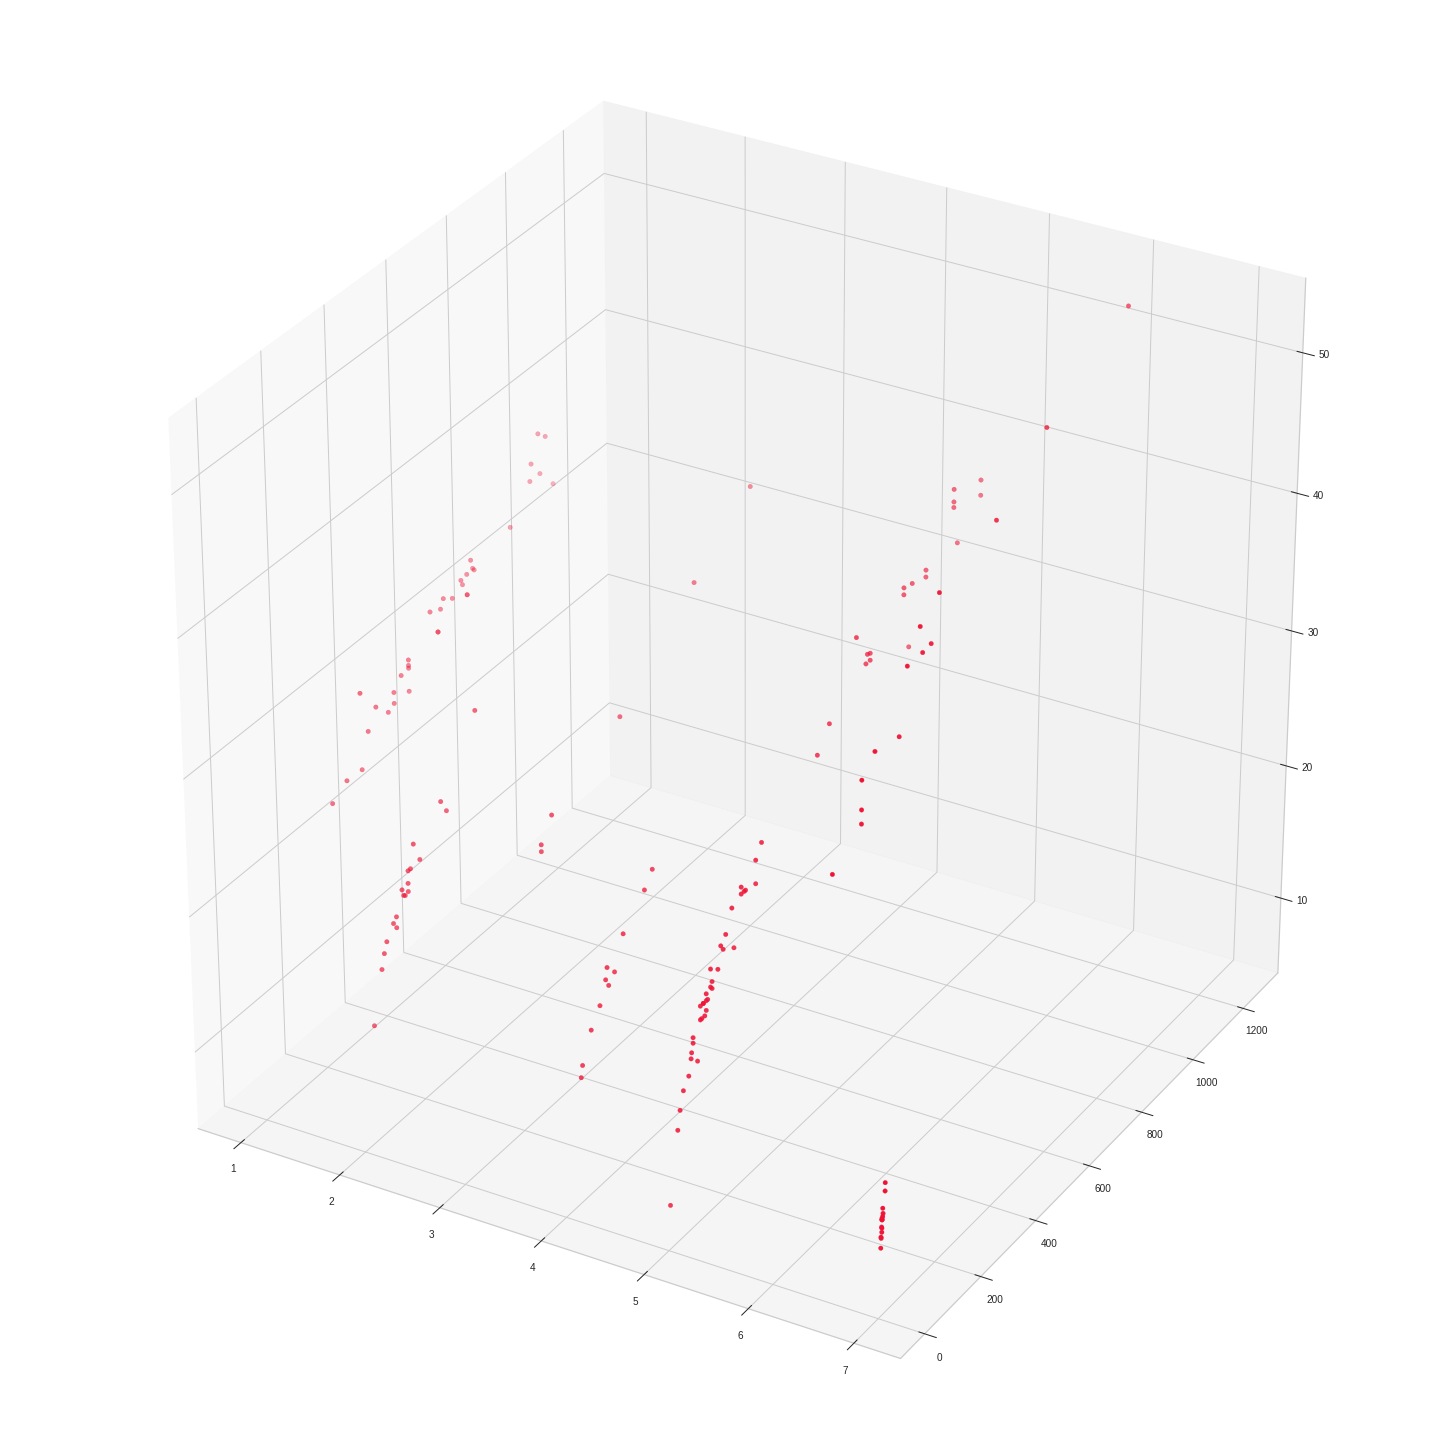

In [273]:
from mpl_toolkits.mplot3d import Axes3D
# Ploting the Species, weight, lenght1 as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(species, weight, length1, color='#ef1234')
plt.show()

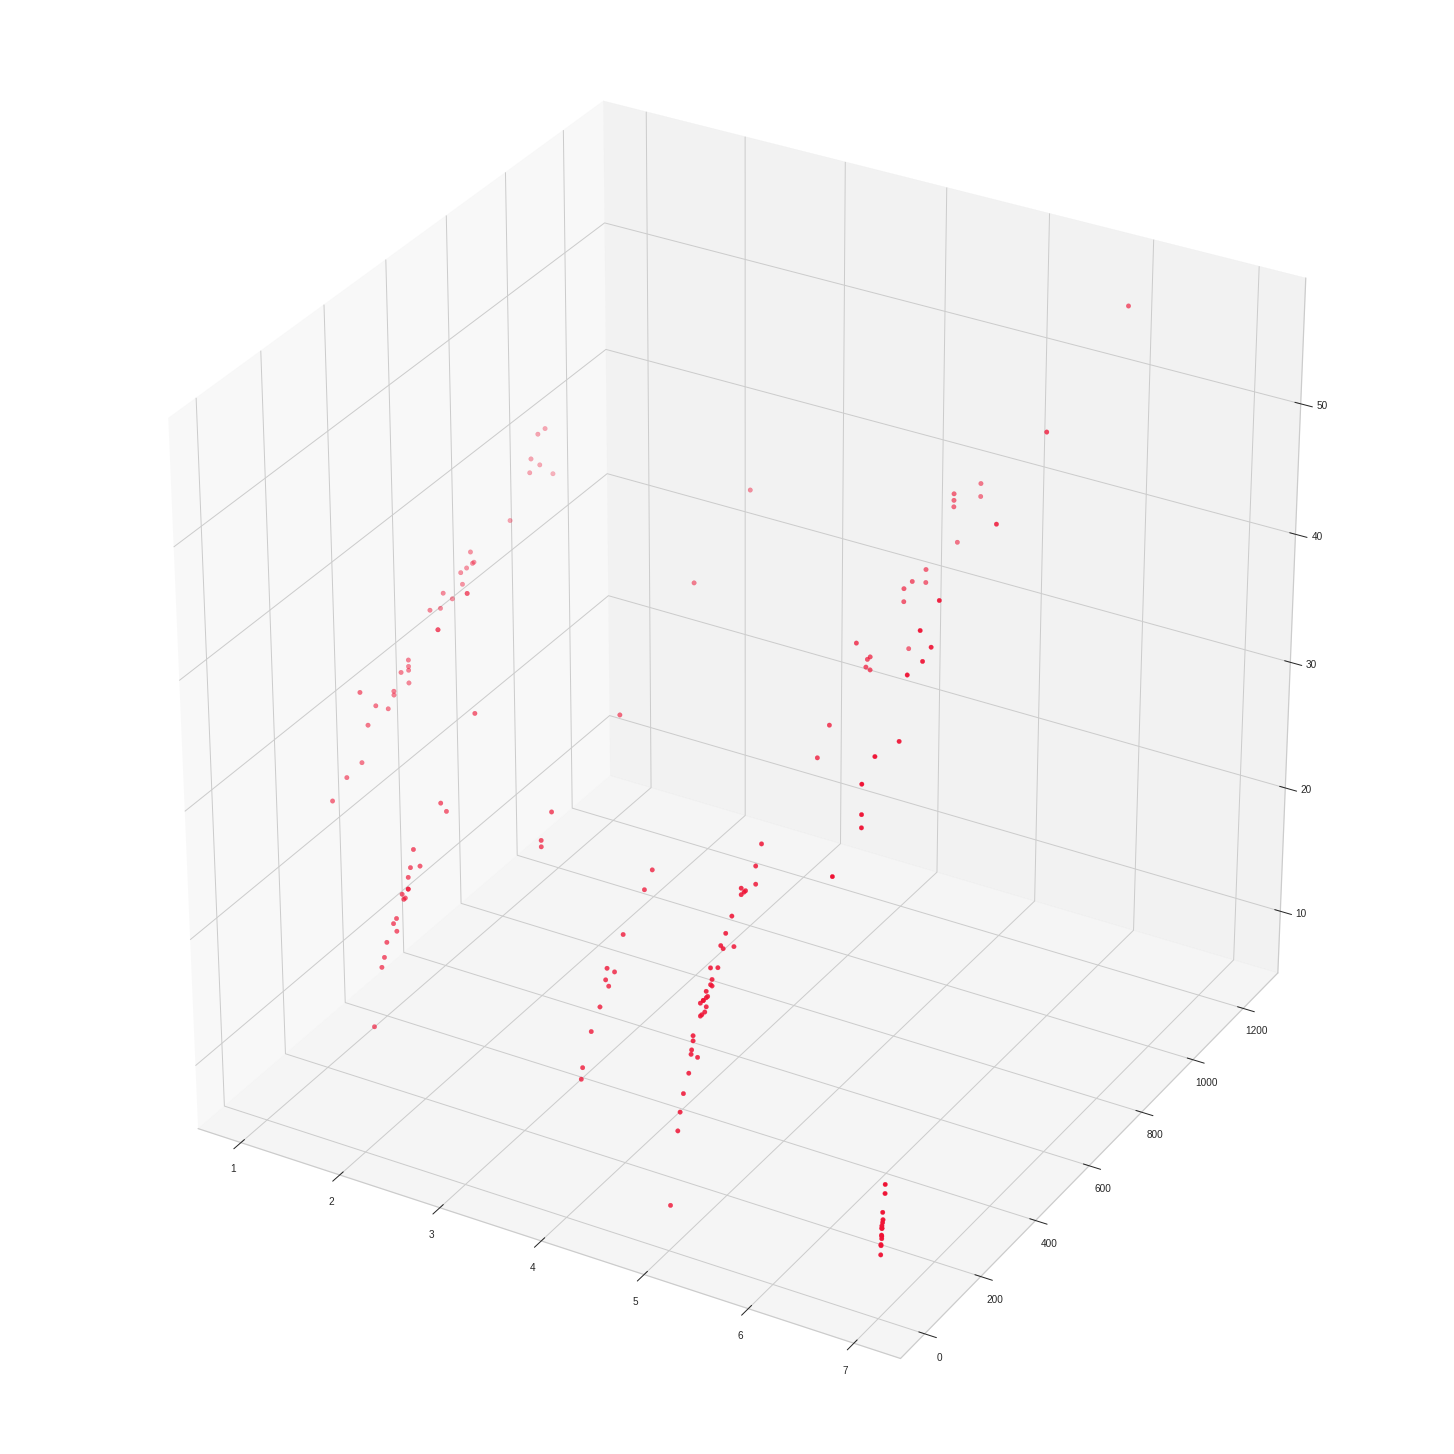

In [274]:
from mpl_toolkits.mplot3d import Axes3D
# Ploting the Species, weight, lenght2 as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(species, weight, length2, color='#ef1234')
plt.show()

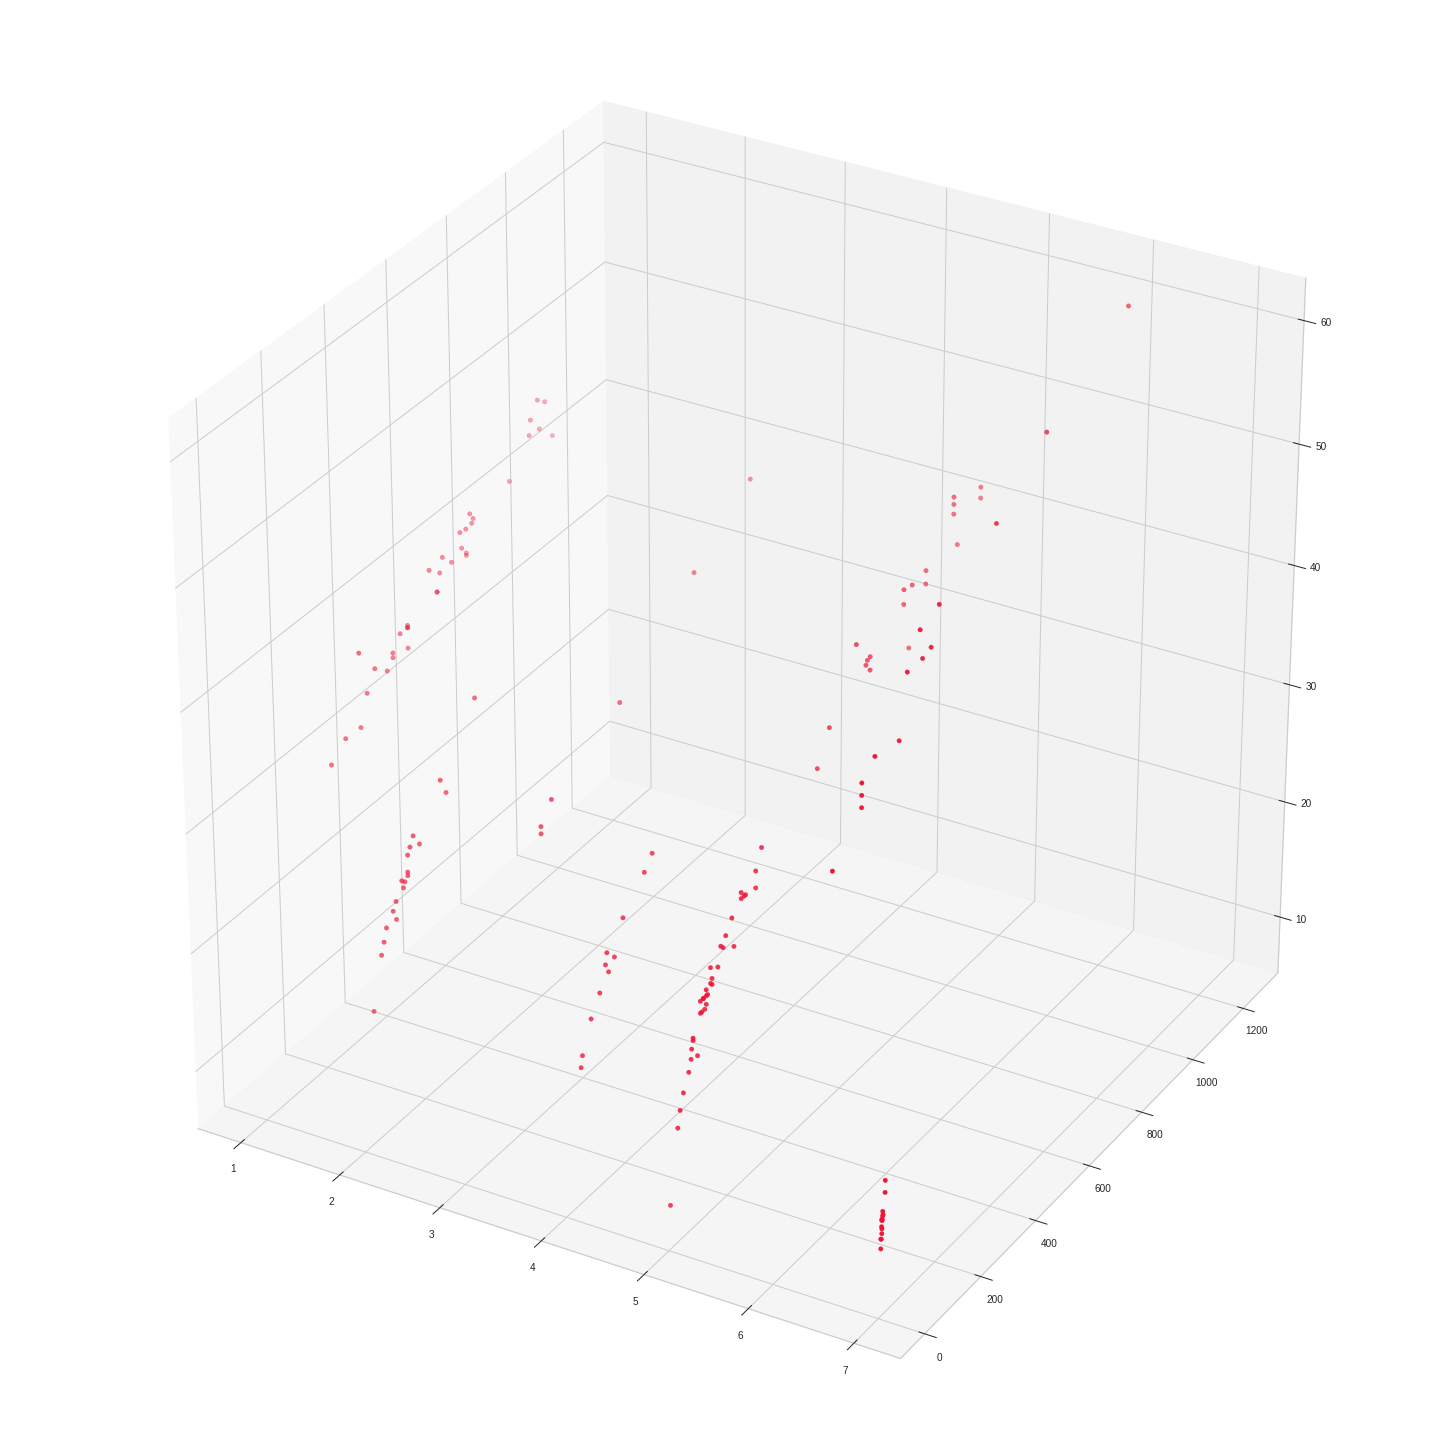

In [275]:
from mpl_toolkits.mplot3d import Axes3D
# Ploting the Species, weight, lenght3 as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(species, weight, length3, color='#ef1234')
plt.show()

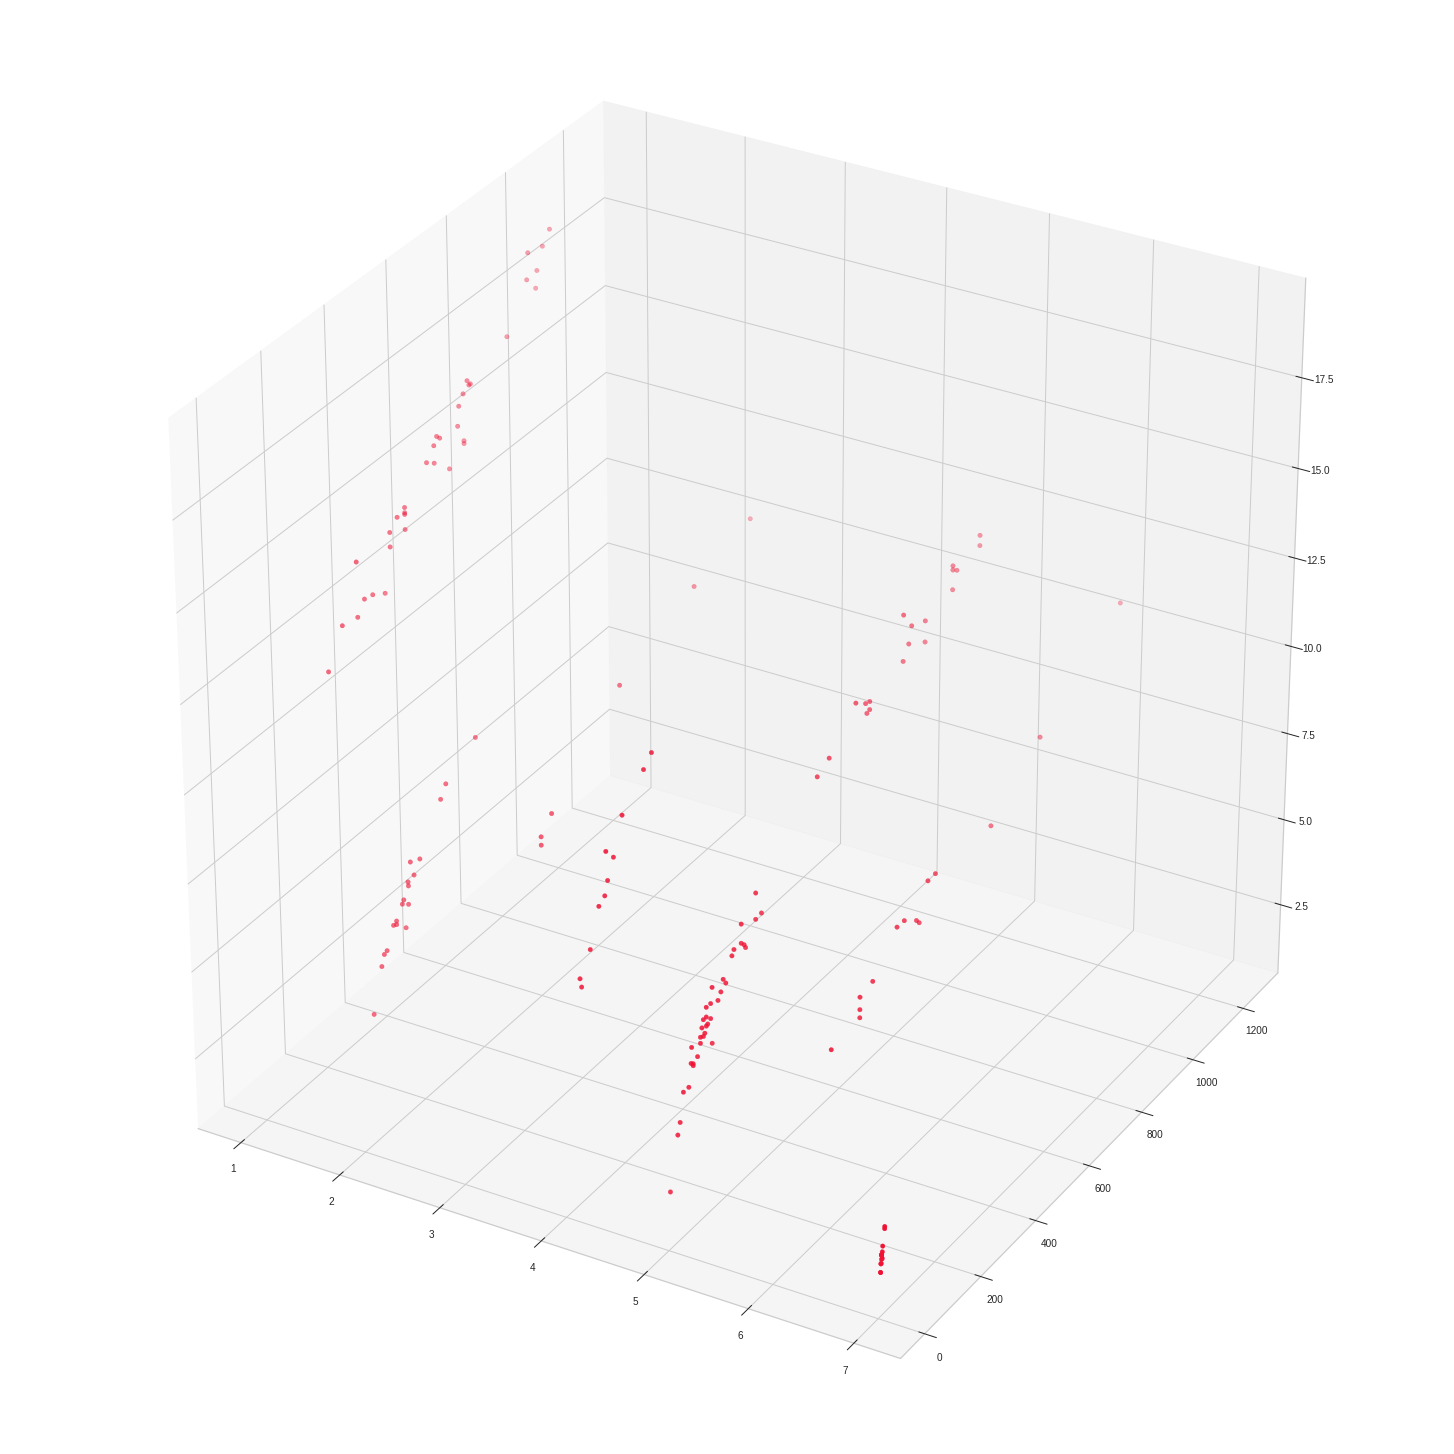

In [276]:
from mpl_toolkits.mplot3d import Axes3D
# Ploting the Species, weight, height as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(species, weight, height, color='#ef1234')
plt.show()

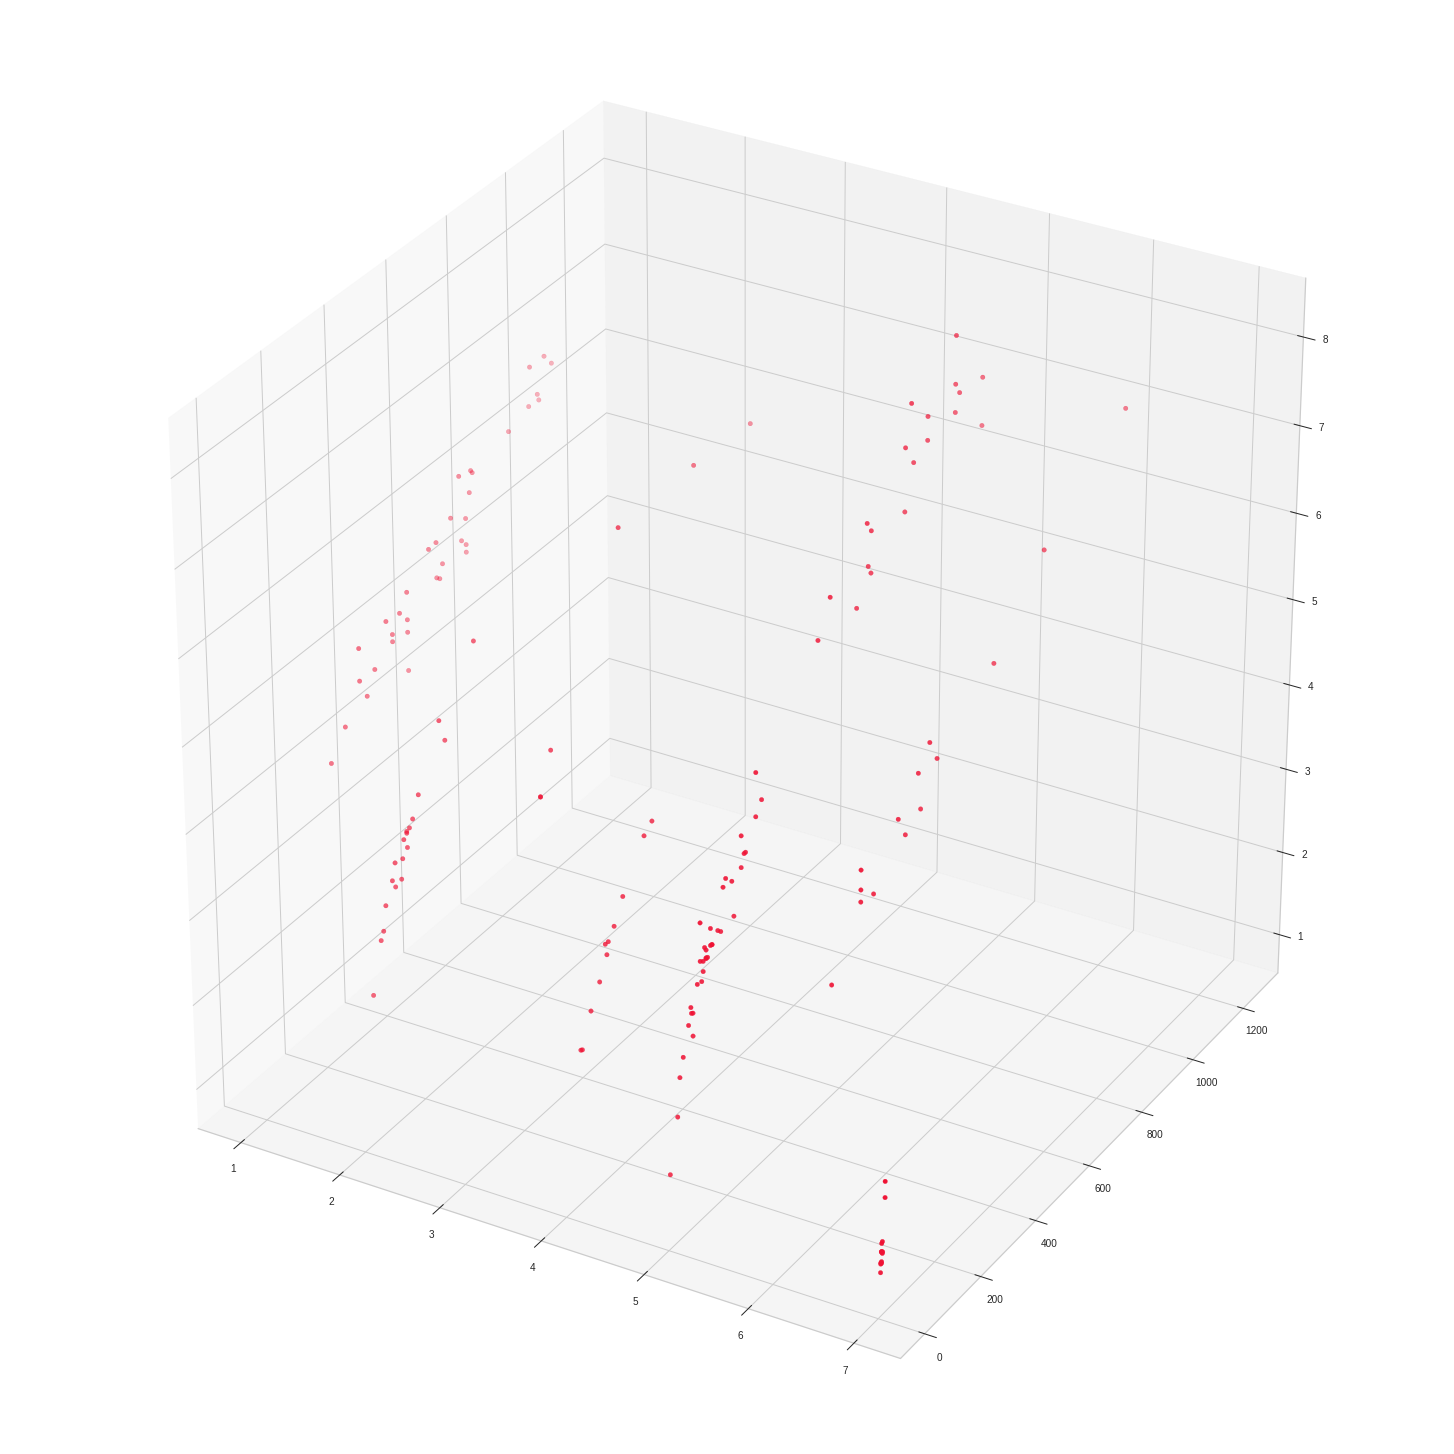

In [277]:
from mpl_toolkits.mplot3d import Axes3D
# Ploting the Species, weight, width as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(species, weight, width, color='#ef1234')
plt.show()

# 3. Build Primary Model[Multiple Linear Regression][5]:
Once you have cleaned, transformed and Visualize your data build Multiple Linear Regression Model from
Scratch.

# Step-1: Store the arrays in the Matrix Form:
Implement Following Equations:

\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}
In Machine Learning parameters $\theta$ are also called weights, so from this step onwards we represent $\theta$ as $\textbf{W}$.

Here-Now:
\begin{align}
        \mathbf{Y} = W^T X + W_0
    \end{align}

\begin{align}
        \mathbf{W} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

The equation Y=θTX+θ0 is for linear regression model. Here Y is dependent variable and X is independent variable. Theta is a vector of coefficients, and theta0 is the intercept.
The dependent variable Y's value is predicted by multiplying the independent variable X by the coefficients in this equation. When all of the independent variables are equal to zero, the value of Y is predicted to be equal to the intercept 0, which is represented by the term TX, which represents the linear combination of the independent variable and coefficients.

Finding the coefficients and intercept values in linear regression that best match the observed data is the objective. To achieve this, it is generally necessary to minimize the sum of the squared differences between the observed and predicted values of Y. 

The equation can be used to forecast future data after the coefficients have been estimated. The model can be used to forecast the value of the dependent variable given a set of independent variable values. Y = TX + 0, where TX is the linear combination of the independent variable and coefficients, and 0 is the intercept, gives the prediction.

In [278]:
x0 = np.ones(len(species)) #array of ones having same shape as species
X2 = np.array([x0,species, length1, length2, length3, height, width]).T #arrray with shape (n,7)
W = np.array([0, 0 , 0, 0, 0, 0, 0]) #array of 0 having same shape as X2
Y2 = np.array(weight) #array of column weight


# Step-2: Implement a Error/Cost Function.

We will use the Cost function: Mean Square Error i.e.
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(y_{pred} - y_i)^2
    \end{align}

Further Simplifications:

\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x_i) - y_i)^2
    \end{align}
Here:
\begin{align}
  h_\theta = \theta_1*x 
    \end{align}

Note:
In Machine Learning, m: denotes the length of the array (total No of rows in our case).



A cost function, sometimes referred to as a loss function or an objective function, is a mathematical function that assesses the discrepancy between the values that a machine learning model predicts and the actual values. The cost function's objective is to quantify the error or "cost" connected to a specific set of model parameters.

In [279]:
#Defining cost function
#return Mean Sqaure Error
def cost_function(X, Y, W):
    """ Input parameters:
      X: Feature Matrix
      Y: Target Matrix
      W: Weight Matrix
    Output Parameters:
      error_term: accumulated mean square error.
    """
    m = len(Y) # len of data in your datasets
    h_x =np.dot(X,W)
    
    error_term = sum((h_x - Y) ** 2)/(2 * m)
    return error_term

In [280]:
#calling cost_funtion and passing values
inital_cost = cost_function(X2, Y2, W)
print(inital_cost)

121903.30454838714


## Step-3: Optimization Algorithm

Our goal in this task is to minimize our error function with each input of examples(input data). 
One of the most suitable methods to do the same is 
\begin{align}
$\color{red}{\textbf{GRADIENT DESCENT ALGOROTHIM.}}$
\end{align}

Implement GDA from Scratch.

Function to estimate: 
  *   $h_\theta(x) = \theta^T x$

Loss function to minimize:
  *   $(h_\theta(x) - y)^2$

Gradient: Decsent update:
  *   $\theta_(j+1)   = \theta_j - LR(D_\theta)$
  *   $D(\theta) = 1/m * (\theta^T * X)$ i.e. Derivative of parameters/weights.





In machine learning and deep learning, the gradient descent optimization algorithm is used to determine the minimum of a cost function. Finding the parameters that minimize the cost function, which calculates the difference between the projected values and the actual values, is the objective of gradient descent.

In [281]:
#function for gradient descent have 5 arguments input matrix, target vector, alpha, and iterations
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations #initializes a list with iterations elements each set to 0
    m = len(Y)
    
    for iteration in range(iterations): #iterates for iterations time
        #analyze predicted target vector ysing B and X
        Y_pred = X.dot(B) 
        #difference between predicted value and actual value
        loss = Y_pred - Y
        #computes the gradient of the cost function with respect to the parameter vector B
        dw = (X.T.dot(loss) ) / (m)
        #update model parameters to minimize loss
        W_update = W - alpha * dw
        #computes the value of cost function
        cost = cost_function(X, Y, W_update)
        #stores current value of cost_function
        cost_history[iteration] = cost
        
    return W_update, cost_history


With a learning rate (alpha) of 0.0001, the gradient descent process proceeds through 100,000 iterations in this case. With the inputs X2, Y2, initial weights W, learning rate beta, and iterations, it calls the gradient descent function. The function delivers a history of the cost values throughout all iterations together with the updated weights. The last number in the history cost array, which represents the cost of the iterations, is printed along with the final updated weights. Indicating how well the model fits the data, this figure shows the total cost once the algorithm has converged.

In [282]:
# 100000 Iterations
alpha = 0.0001 # Setting Learning Rate Value
new_weights, cost_history = gradient_descent(X2, Y2, W, alpha, 100000)

# New Values of
print(new_weights) #prints the final parameter computed by gradient_descent function

#prints the final cost function value
print(cost_history[-1])

[0.03776381 0.12690742 1.22989233 1.33087914 1.46456563 0.44883324
 0.21458672]
72901.90072171092


In [283]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rmse: Root Mean Square.
  """
  rmse = np.sqrt(sum((Y-Y_pred)**2)/len(Y))
  return rmse

# Model Evaluation - R2

def r2(Y, Y_pred):
  """
   This Function calculates the R Squared Error.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.  
  Output Arguments:
    rsquared: R Squared Error.
    """
  mean_y = np.mean(Y)
  ss_tot = sum((Y - mean_y) ** 2)
  ss_res = sum((Y - Y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2
  

In [284]:
#calculates predicted target value by dot product of X2 and new_weights
Y_pred = X2.dot(new_weights)

print(rmse(Y2, Y_pred))
print(r2(Y2, Y_pred))

381.84263963499654
-0.4408045323282568


# 4. Model Evaluation[1]:
Pick an appropriate evaluation metric to evaluate your model on the test set.

In [285]:
#train_test_split function is used to apply split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [286]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (124, 5)
y_train:  (124,)
X_test:  (31, 5)
y_test:  (31,)


In [287]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #instance of linear regression class
reg.fit(X_train,y_train) #fit method to train data

LinearRegression()

In [288]:
# Parameter of Model
print('Intercept of Model: ', reg.intercept_)
print('Coefficients of Model: ', reg.coef_)

Intercept of Model:  -425.3941488502111
Coefficients of Model:  [ 91.3179469  -42.35228778 -30.9781378   30.68288625  69.49559045]


In [289]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -425.39 + 91.32*X1 -42.35*X2 -30.98*X3 + 30.68*X4 + 69.50*X5


In [290]:
#prediction on training data
y_head = reg.predict(X_train)

In [291]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_train, y_head)) #mean_square_error
print(r2_score(y_train, y_head)) #R-squared value

9145.536507003175
0.9071277485902981


In [292]:
mse  = mean_squared_error(y_train, y_head)
mse

9145.536507003175

In [293]:
r2 = r2_score(y_train, y_head)
r2

0.9071277485902981

# 5. Dimensionality Reduction[6]:

Apply Principal Component Analysis to reduce the dimension and rebuild the model with reduced fea-
tures,evaluate the model and Compare the output with the evaluation from step 4.

Data analysis and machine learning frequently use the dimensionality reduction method known as Principal Component Analysis (PCA). A high-dimensional dataset's underlying structure should be found, and PCA should be used to reduce the dataset's dimensions while retaining the majority of its variance.

In [294]:
from sklearn.decomposition import PCA

#performing PCA on training and test data 
pca = PCA(n_components=3)
#fits X_train in PCA model on the training data and transform the training data to reduced feature space
X_train_pca = pca.fit_transform(X_train)
#fits X_train in PCA model on the test data and transform the training data to reduced feature space
X_test_pca = pca.transform(X_test)
#initializing linear regression
regressor_pca = LinearRegression()
regressor_pca.fit(X_train_pca, y_train)
y_pred_pca = regressor_pca.predict(X_test_pca)

# Evaluating model using mean_sqaured_error
mse_pca = mean_squared_error(y_test, y_pred_pca)
print("Mean Squared Error after PCA:", mse_pca)



Mean Squared Error after PCA: 12967.269123173643


In [295]:
# Evaluating model using R2
r2_pca = r2_score(y_test, y_pred_pca)
print("R2 for PCA:", mse_pca)

if r2 < r2_pca:
    print("The model without PCA works better.")
else:
    print("The model with PCA works better.")

R2 for PCA: 12967.269123173643
The model with PCA works better.


While comparing Root square before and after PCA, the R2 before PCA is less than R2 after PCA. Hence the model with PCA works beter.

In [296]:
X.shape

(155, 5)

In [297]:
X_train.shape

(124, 5)

In [298]:
X_train_pca.shape

(124, 3)

In [299]:
X_test_pca.shape

(31, 3)

Linear regression can handle large datasets and can still provide accurate results. This makes it an important tool for big data analysis, where it is common to have thousands or even millions of observations. Linear regression is an important and widely used statistical tool that provides a simple and effective way to model the relationship between variables and make predictions based on that relationship.